# Mixup augmentation for NLP

Using IMDB sentiment classification dataset

In [1]:
# Import libraries
try:
  import textaugment
except ModuleNotFoundError:
  !pip install textaugment
  import textaugment

import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb

from textaugment import MIXUP
%matplotlib inline

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=4de7ce4b52a5c57a680d9c96137d12291609a418bf5fdd1cf158003f747c7589
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [2]:
tf.__version__

'2.2.0'

In [3]:
textaugment.__version__

'1.3'

## Initialize constant variables

In [ ]:
# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 10
runs = 1

In [5]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


## Initialize mixup

In [ ]:
mixup = MIXUP()
generator, step = mixup.flow(x_train, y_train, batch_size=batch_size, runs=runs)

In [7]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 50)           250000    
_________________________________________________________________
dropout (Dropout)            (None, 400, 50)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

## Train model using mixup augmentation

In [8]:
h1 = model.fit(generator, steps_per_epoch=step,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6867 - accuracy: 0.2859 - val_loss: 0.6408 - val_accuracy: 0.6537
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6655 - accuracy: 0.3081 - val_loss: 0.6140 - val_accuracy: 0.6620
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6443 - accuracy: 0.3267 - val_loss: 0.5688 - val_accuracy: 0.7233
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6250 - accuracy: 0.3287 - val_loss: 0.5167 - val_accuracy: 0.7434
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6140 - accuracy: 0.3337 - val_loss: 0.5154 - val_accuracy: 0.7534
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6029 - accuracy: 0.3338 - val_loss: 0.4763 - val_accuracy: 0.7765
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5976 - accuracy: 0.3314 - val_loss: 0.4659 - val_accuracy: 0.7810

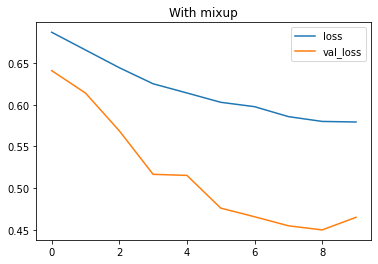

In [9]:
pd.DataFrame(h1.history)[['loss','val_loss']].plot(title="With mixup")

In [10]:
print('Build model...')
model2 = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model2.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model2.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model2.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model2.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model2.add(Dense(hidden_dims))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model2.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [11]:
h2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 0.4057 - accuracy: 0.7964 - val_loss: 0.2819 - val_accuracy: 0.8825
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2260 - accuracy: 0.9100 - val_loss: 0.2540 - val_accuracy: 0.8957
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1579 - accuracy: 0.9409 - val_loss: 0.2806 - val_accuracy: 0.8874
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1056 - accuracy: 0.9625 - val_loss: 0.3103 - val_accuracy: 0.8897
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0732 - accuracy: 0.9730 - val_loss: 0.3593 - val_accuracy: 0.8838
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0539 - accuracy: 0.9808 - val_loss: 0.3938 - val_accuracy: 0.8884
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0419 - accuracy: 0.9854 - val_loss: 0.4444 - val_accuracy: 0.8817

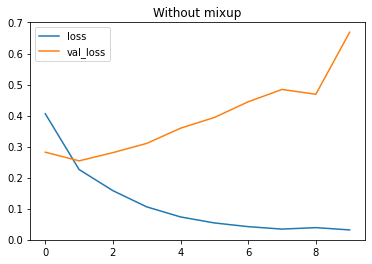

In [12]:
pd.DataFrame(h2.history)[['loss','val_loss']].plot(title="Without mixup")

# Comparison
See the loss curve with mixup does not overfit.

## Cite the paper
```
@article{marivate2019improving,
  title={Improving short text classification through global augmentation methods},
  author={Marivate, Vukosi and Sefara, Tshephisho},
  journal={arXiv preprint arXiv:1907.03752},
  year={2019}
}```

https://arxiv.org/abs/1907.03752